In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
sys.path.append("../")

import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, fftfreq, fftshift

### Sinusoidal (cosine)
Frequency $f=5$ Hz

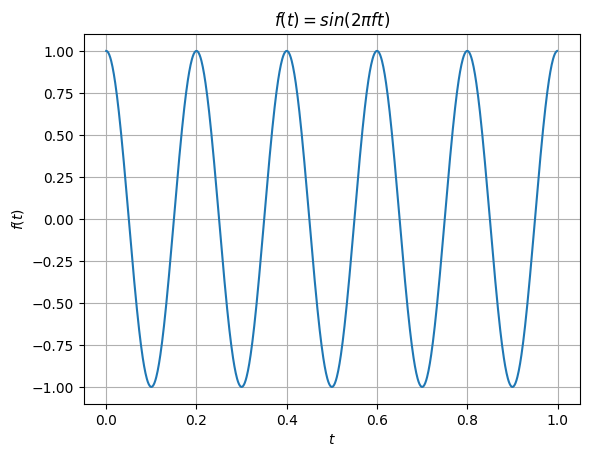

In [42]:
N = 1000 # sample points
f = 5 # signal frequency (inverse of period)
t = np.linspace(0.0, 1.0, N, endpoint=False)
f_t = np.cos(2 * np.pi * f * t)
plt.plot(t, f_t)
plt.title("$f(t) = sin(2 \pi f t)$")
plt.xlabel("$t$")
plt.ylabel("$f(t)$")
plt.grid(True)
plt.show()

### Complex sinusoidal
Frequency $k=5$ Hz

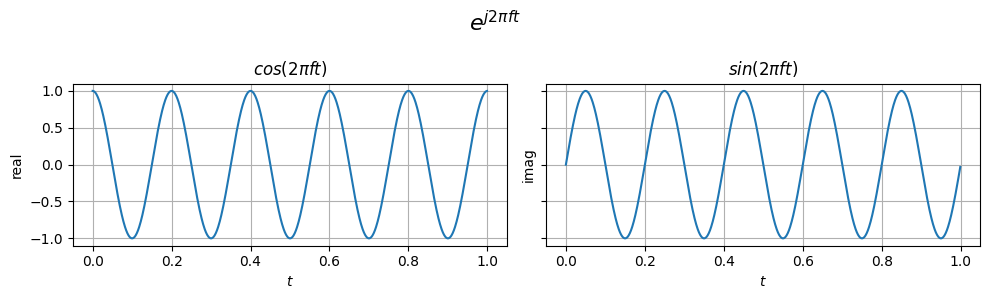

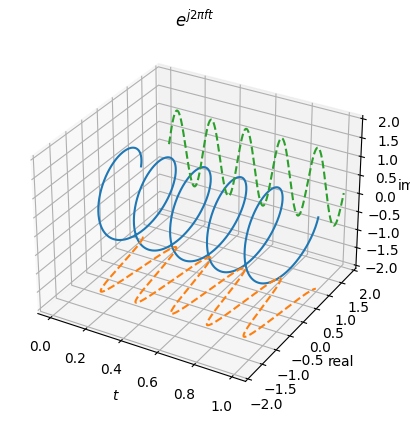

In [62]:
fig, axs = plt.subplots(1, 2, figsize=(10, 3), sharey=True)

# real x t
y = np.exp(2j * np.pi * f * t)
axs[0].plot(t, y.real)
axs[0].set_title("$cos(2 \pi f t)$")
axs[0].set_xlabel("$t$")
axs[0].set_ylabel("real")
axs[0].grid(True)

# imag x t
axs[1].plot(t, y.imag)
axs[1].set_title("$sin(2 \pi f t)$")
axs[1].set_xlabel("$t$")
axs[1].set_ylabel("imag")
axs[1].grid(True)
plt.suptitle("$e^{j 2 \pi f t}$", fontsize=16)
plt.tight_layout()
plt.show()

# real x imag x t
fig, axs = plt.subplots(1, 2, figsize=(10, 3), sharey=True)
ax.plot(t, y.real, zs=y.imag, zdir='z')
ax.plot(t, y.real, zs=-2, zdir='z', linestyle="dashed")
ax.plot(t, 2 * np.ones_like(t), zs=y.imag, zdir='z', linestyle="dashed")
ax.set_xlabel("$t$")
ax.set_ylabel("real")
ax.set_zlabel("imag")
ax.set_title("$e^{j 2 \pi f t}$")
ax.set_ylim((-2, 2))
ax.set_zlim((-2, 2))
plt.show()

### Shifting the complex sinusoidal

$D_1 = 1$

$D_2 = 1j$

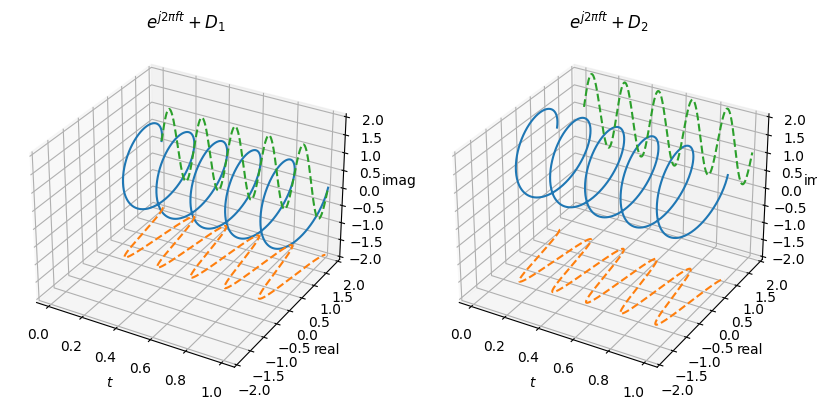

In [38]:
fig, axs = plt.subplots(1, 2, figsize=(10, 5), subplot_kw={"projection": "3d"})

D1 = 1
D2 = 1j

for i, D in enumerate([D1, D2]):
    y_shifted = y + D
    axs[i].plot(t, y_shifted.real, zs=y_shifted.imag, zdir='z')
    axs[i].plot(t, y_shifted.real, zs=-2, zdir='z', linestyle="dashed")
    axs[i].plot(t, 2 * np.ones_like(t), zs=y_shifted.imag, zdir='z', linestyle="dashed")
    axs[i].set_xlabel("$t$")
    axs[i].set_ylabel("real")
    axs[i].set_zlabel("imag")
    axs[i].set_title(f"$e^{{j 2 \pi f t}} + D_{i+1}$")
    axs[i].set_ylim((-2, 2))
    axs[i].set_zlim((-2, 2))
plt.show()

### Scaling the complex sinusoidal

$C_1 = e^{j \cdot 0 } = 1$

$C_2 = 2 e^{j \cdot 0 } = 2$

$C_3 = 2 e^{j \frac{\pi}{2}} = 0 + 2j = 2j$

$C_4 = 2\sqrt{2} e^{j \frac{\pi}{4}} = 2 + 2j$

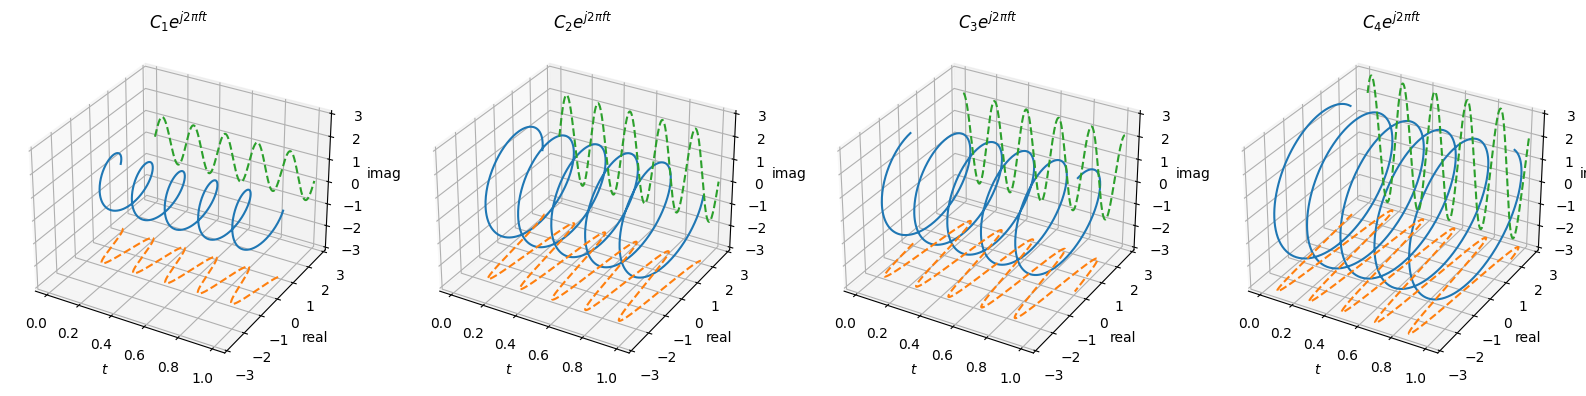

In [31]:
fig, axs = plt.subplots(1, 4, figsize=(20, 5), subplot_kw={"projection": "3d"})
C1 = 1
C2 = 2
C3 = 2j
C4 = 2 + 2j
for i, C in enumerate([C1, C2, C3, C4]):
    y_scaled = C * y
    amp = np.abs(C)
    axs[i].plot(t, y_scaled.real, zs=y_scaled.imag, zdir='z')
    axs[i].plot(t, y_scaled.real, zs=-3, zdir='z', linestyle="dashed")
    axs[i].plot(t, 3 * np.ones_like(t), zs=y_scaled.imag, zdir='z', linestyle="dashed")
    axs[i].set_xlabel("$t$")
    axs[i].set_ylabel("real")
    axs[i].set_zlabel("imag")
    axs[i].set_title(f"$C_{i+1} e^{{j 2 \pi f t}}$")
    axs[i].set_ylim((-3, 3))
    axs[i].set_zlim((-3, 3))
plt.show()

### FFT

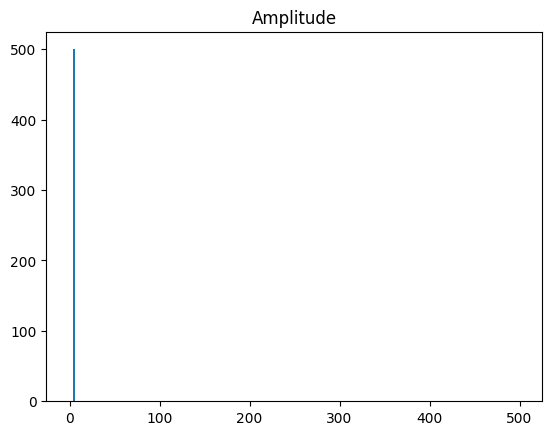

In [8]:
F_u = np.fft.fft(f_x)
freqs = np.fft.fftfreq(x.size, x[1] - x[0])
amp = np.abs(F_u)
plt.bar(freqs[: N//2], amp[: N //2], width=2) # plot the positive frequencies
plt.title("Amplitude")
plt.show()

In practice, the sin contribution (imaginary part) is almost neglectable comparing to cos (real). This indicating no phase shift in the original domain.

In [9]:
F_u[amp>1]
freqs[amp>1]

array([ 5., -5.])

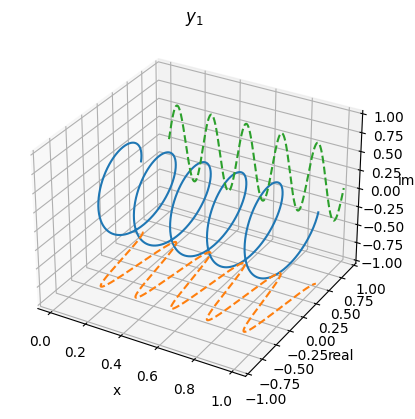

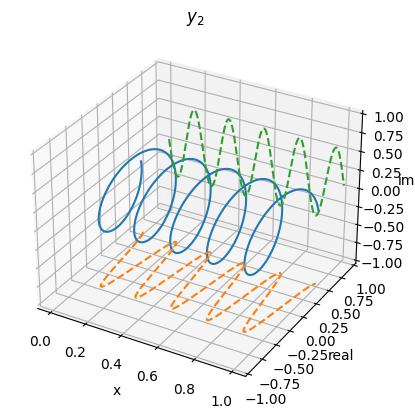

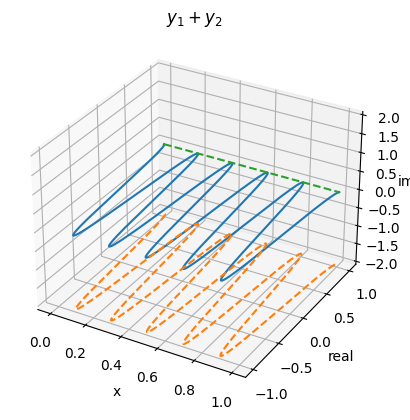

In [21]:

F_u = np.fft.fft(f_x)
amp = np.abs(F_u)
y1 = F_u[amp>1][0] * np.exp(2j * np.pi * k * x) / N
y2 = F_u[amp>1][1] * np.exp(2j * np.pi * (-k) * x) / N
y3 = (y1 + y2)

ax = plt.figure().add_subplot(projection="3d")
ax.plot(x, y1.real, zs=y1.imag, zdir='z')
ax.plot(x, y1.real, zs=-1, zdir='z', linestyle="dashed")
ax.plot(x, np.ones_like(x), zs=y1.imag, zdir='z', linestyle="dashed")
ax.set_xlabel("x")
ax.set_ylabel("real")
ax.set_zlabel("imag")
ax.set_title("$y_1$")
ax.set_ylim((-1, 1))
ax.set_zlim((-1, 1))
plt.show()


ax = plt.figure().add_subplot(projection="3d")
ax.plot(x, y2.real, zs=y2.imag, zdir='z')
ax.plot(x, y2.real, zs=-1, zdir='z', linestyle="dashed")
ax.plot(x, np.ones_like(x), zs=y2.imag, zdir='z', linestyle="dashed")
ax.set_xlabel("x")
ax.set_ylabel("real")
ax.set_zlabel("imag")
ax.set_title("$y_2$")
ax.set_ylim((-1, 1))
ax.set_zlim((-1, 1))
plt.show()

ax = plt.figure().add_subplot(projection="3d")
ax.plot(x, y3.real, zs=y3.imag, zdir='z')
ax.plot(x, y3.real, zs=-2, zdir='z', linestyle="dashed")
ax.plot(x, np.ones_like(x), zs=y3.imag, zdir='z', linestyle="dashed")
ax.set_xlabel("x")
ax.set_ylabel("real")
ax.set_zlabel("imag")
ax.set_title("$y_1 + y_2$")
# ax.set_ylim((-400, 400))
ax.set_zlim((-2, 2))
plt.show()

In [11]:
Note ac

array([ 5.00000000e+02-1.20087899e-13j,  4.99753280e+02+1.57053795e+01j,
        4.99013364e+02+3.13952598e+01j,  4.97780982e+02+4.70541567e+01j,
        4.96057351e+02+6.26666168e+01j,  4.93844170e+02+7.82172325e+01j,
        4.91143625e+02+9.36906573e+01j,  4.87958381e+02+1.09071621e+02j,
        4.84291581e+02+1.24344944e+02j,  4.80146843e+02+1.39495553e+02j,
        4.75528258e+02+1.54508497e+02j,  4.70440384e+02+1.69368960e+02j,
        4.64888243e+02+1.84062276e+02j,  4.58877313e+02+1.98573945e+02j,
        4.52413526e+02+2.12889646e+02j,  4.45503262e+02+2.26995250e+02j,
        4.38153340e+02+2.40876837e+02j,  4.30371014e+02+2.54520708e+02j,
        4.22163963e+02+2.67913397e+02j,  4.13540287e+02+2.81041689e+02j,
        4.04508497e+02+2.93892626e+02j,  3.95077506e+02+3.06453527e+02j,
        3.85256621e+02+3.18711995e+02j,  3.75055535e+02+3.30655933e+02j,
        3.64484314e+02+3.42273553e+02j,  3.53553391e+02+3.53553391e+02j,
        3.42273553e+02+3.64484314e+02j,  3.30655933